In [111]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
data = read_csv("Book5.csv")

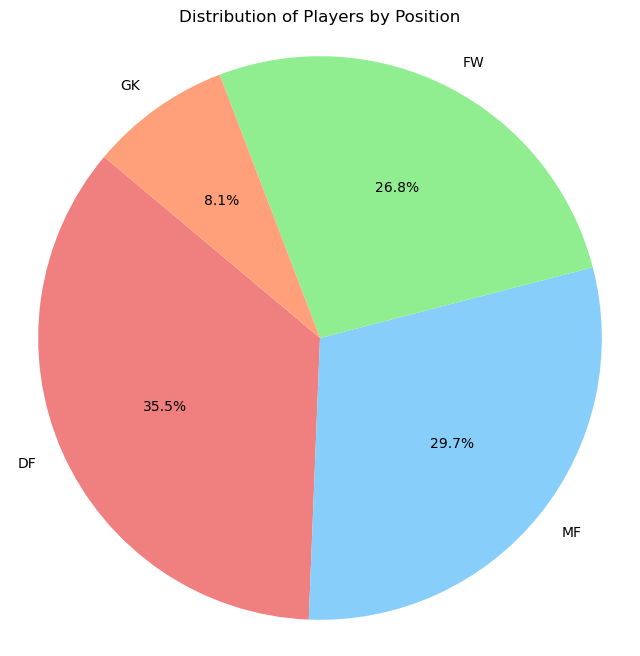

In [112]:
position_counts = data['Pos'].value_counts()

colors = ['lightcoral', 'lightskyblue', 'lightgreen', 'lightsalmon', 'lightpink']

plt.figure(figsize=(8, 8))
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Players by Position')
plt.axis('equal')

plt.show()

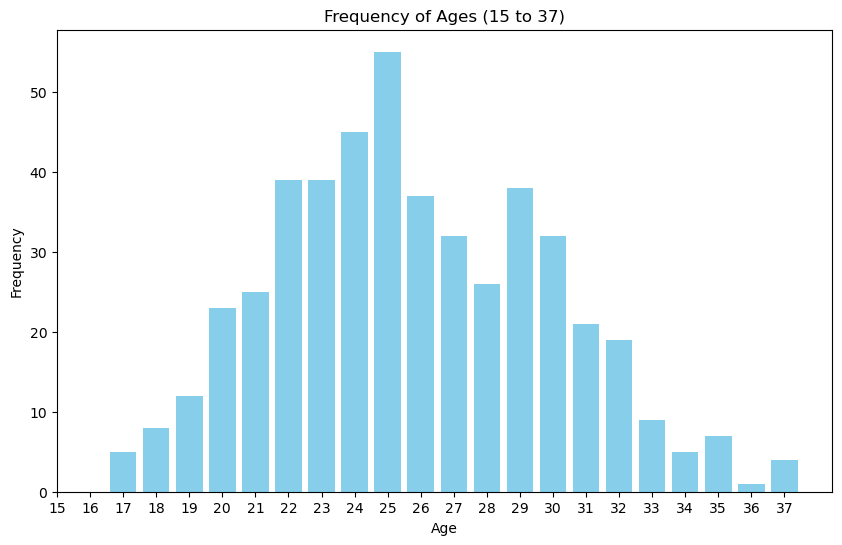

In [113]:
filtered_data = data[(data['Age'] >= 15) & (data['Age'] <= 38)]

age_counts = filtered_data['Age'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue')
plt.title('Frequency of Ages (15 to 37)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(15, 38))
plt.show()

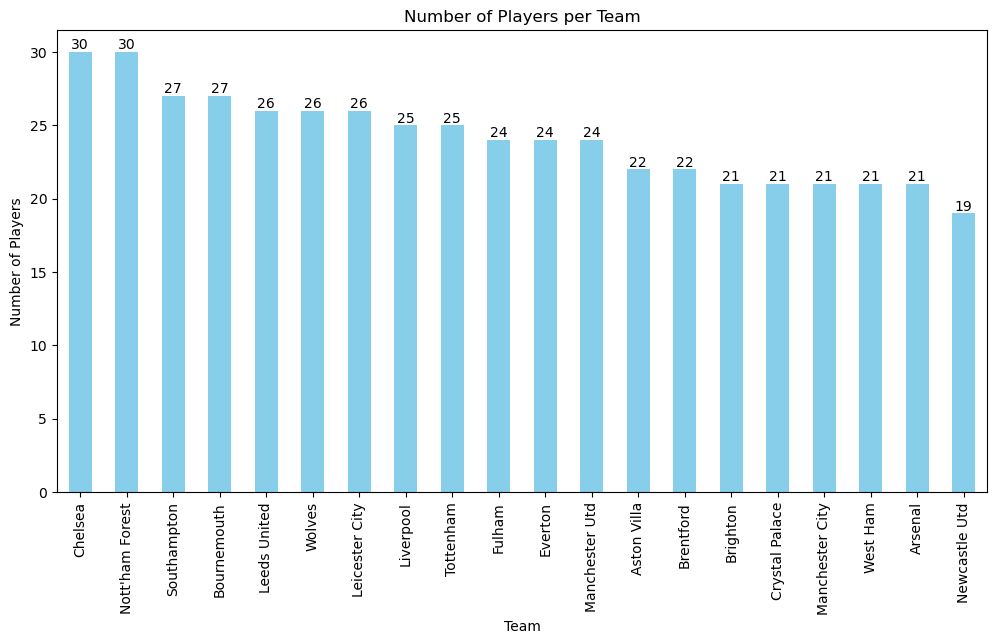

In [114]:
team_counts = data['Squad'].value_counts()

plt.figure(figsize=(12, 6))
ax = team_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Team')
plt.ylabel('Number of Players')
plt.title('Number of Players per Team')
plt.xticks(rotation=90)

for i, count in enumerate(team_counts):
    ax.text(i, count, str(count), ha='center', va='bottom')

plt.show()

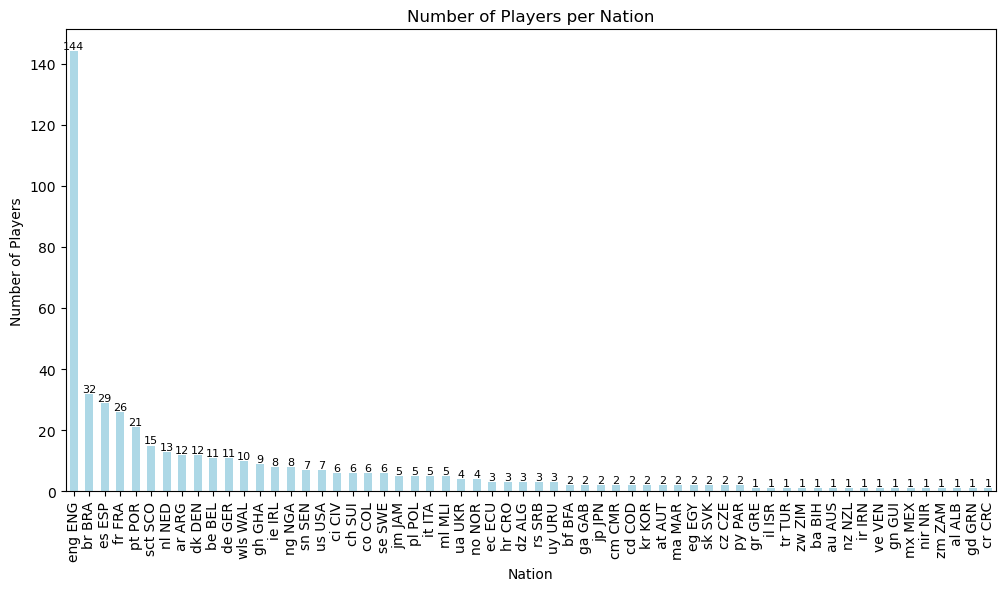

In [115]:
nation_counts = data['Nation'].value_counts()
plt.figure(figsize=(12, 6))
ax = nation_counts.plot(kind='bar', color='lightblue')
plt.xlabel('Nation')
plt.ylabel('Number of Players')
plt.title('Number of Players per Nation')
plt.xticks(rotation=90)
for i, v in enumerate(nation_counts):
    ax.text(i, v, str(v), va='bottom', ha='center', fontsize=8, color='black')

plt.show()

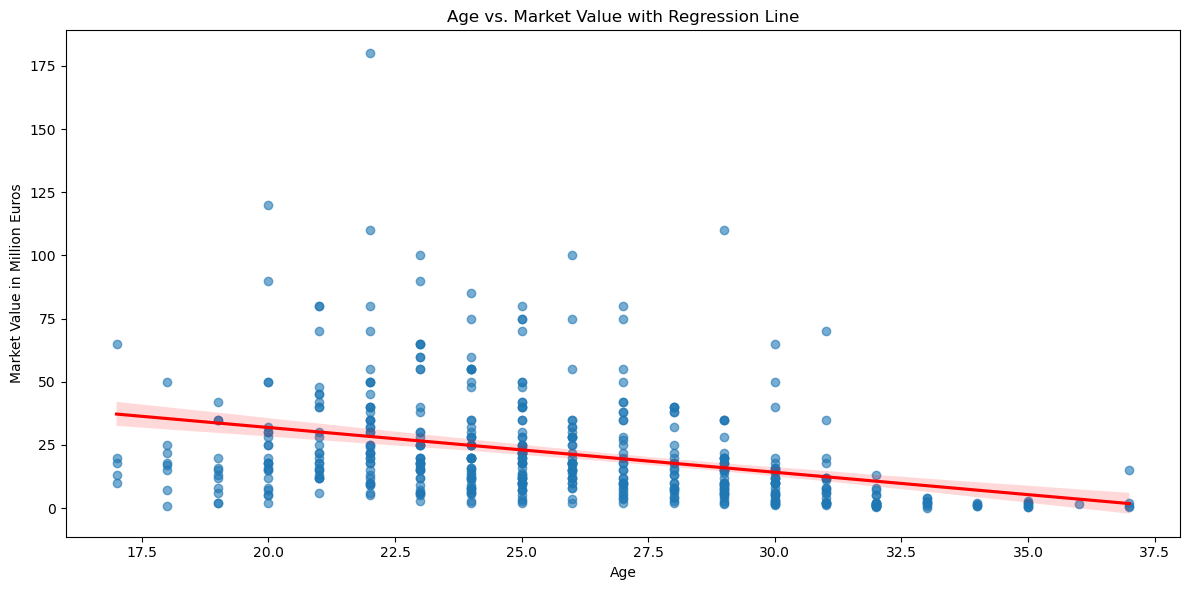

In [116]:
plt.figure(figsize=(12, 6))

sns.regplot(x='Age', y='Market Value', data=data, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})

plt.xlabel('Age')
plt.ylabel('Market Value in Million Euros')
plt.title('Age vs. Market Value with Regression Line')

plt.tight_layout()
plt.show()

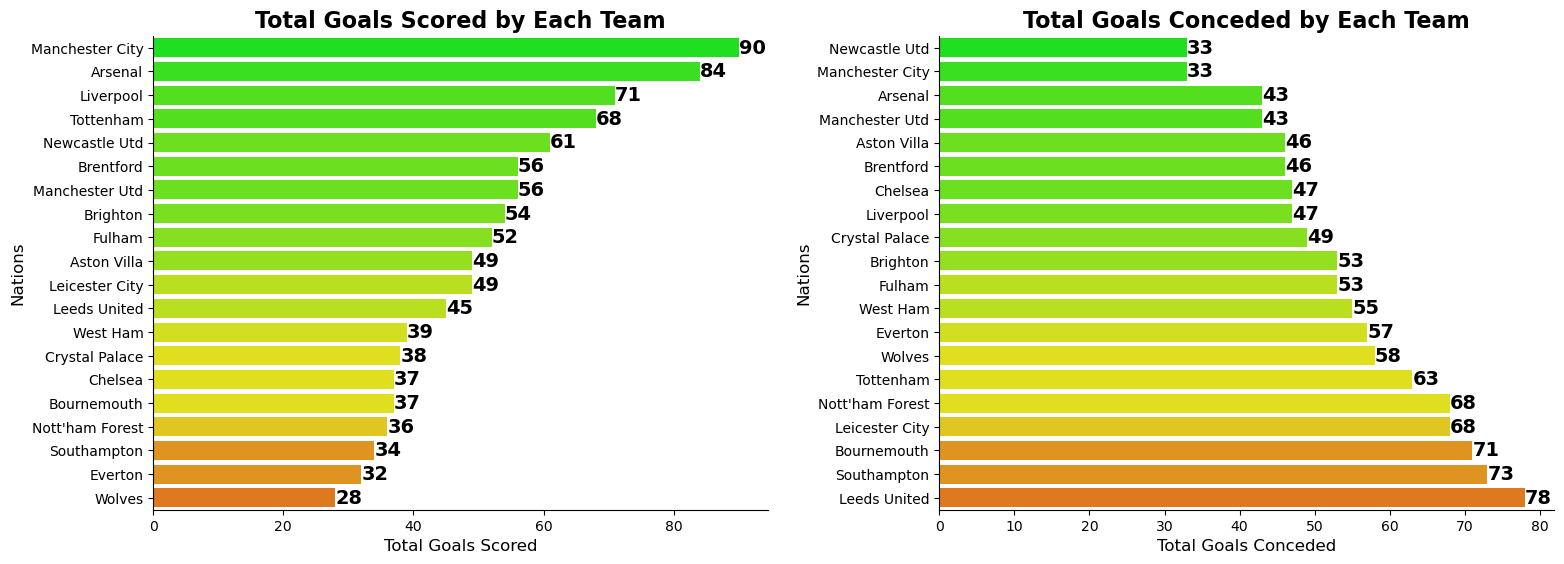

In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))


nation_goals_scored = data.groupby('Squad')['Goals'].sum().reset_index()

nation_goals_scored = nation_goals_scored.sort_values(by='Goals', ascending=False)

colors_scored = [
    "#00FF00", "#22FF00", "#44FF00", "#44FF00", "#66FF00", "#66FF00", "#66FF00", "#77FF00", "#88FF00", "#99FF00",
    "#CCFF00", "#CCFF00", "#EEFF00", "#FFFF00", "#FFFF00", "#FFFF00", "#FFDD00", "#FF9900", "#FF9900", "#FF7700",
    "#FF1100", "#FF0000", "#FF0000", "#FF0000"
]

cmap_scored = sns.color_palette(colors_scored, n_colors=len(nation_goals_scored))

sns.barplot(x='Goals', y='Squad', data=nation_goals_scored, palette=cmap_scored, orient="h", ax=ax1)

ax1.set_title("Total Goals Scored by Each Team", fontsize=16, fontweight='bold')
ax1.set_xlabel("Total Goals Scored", fontsize=12)
ax1.set_ylabel("Nations", fontsize=12)

goalkeeper_data = data[data['Pos'] == 'GK']

nation_goals_conceded = goalkeeper_data.groupby('Squad')['GoalsAg'].sum().reset_index()

nation_goals_conceded = nation_goals_conceded.sort_values(by='GoalsAg', ascending=True)

colors_conceded = [
    "#00FF00", "#22FF00", "#44FF00", "#44FF00", "#66FF00", "#66FF00", "#66FF00", "#77FF00", "#88FF00", "#99FF00",
    "#CCFF00", "#CCFF00", "#EEFF00", "#FFFF00", "#FFFF00", "#FFFF00", "#FFDD00", "#FF9900", "#FF9900", "#FF7700",
    "#FF1100", "#FF0000", "#FF0000", "#FF0000"
]

cmap_conceded = sns.color_palette(colors_conceded, n_colors=len(nation_goals_conceded))

sns.barplot(x='GoalsAg', y='Squad', data=nation_goals_conceded, palette=cmap_conceded, orient="h", ax=ax2)

ax2.set_title("Total Goals Conceded by Each Team", fontsize=16, fontweight='bold')
ax2.set_xlabel("Total Goals Conceded", fontsize=12)
ax2.set_ylabel("Nations", fontsize=12)

for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

top_scoring_nation = nation_goals_scored.nlargest(1, 'Goals')
top_conceding_nation = nation_goals_conceded.nsmallest(1, 'GoalsAg')

for p in ax1.patches:
    width = p.get_width()
    ax1.text(width, p.get_y() + p.get_height() / 2, int(width), ha="left", va="center", fontsize=14, fontweight='bold', color='black')

for p in ax2.patches:
    width = p.get_width()
    ax2.text(width, p.get_y() + p.get_height() / 2, int(width), ha="left", va="center", fontsize=14, fontweight='bold', color='black')

plt.tight_layout(pad=2.0)
plt.show()

<Figure size 1400x1000 with 0 Axes>

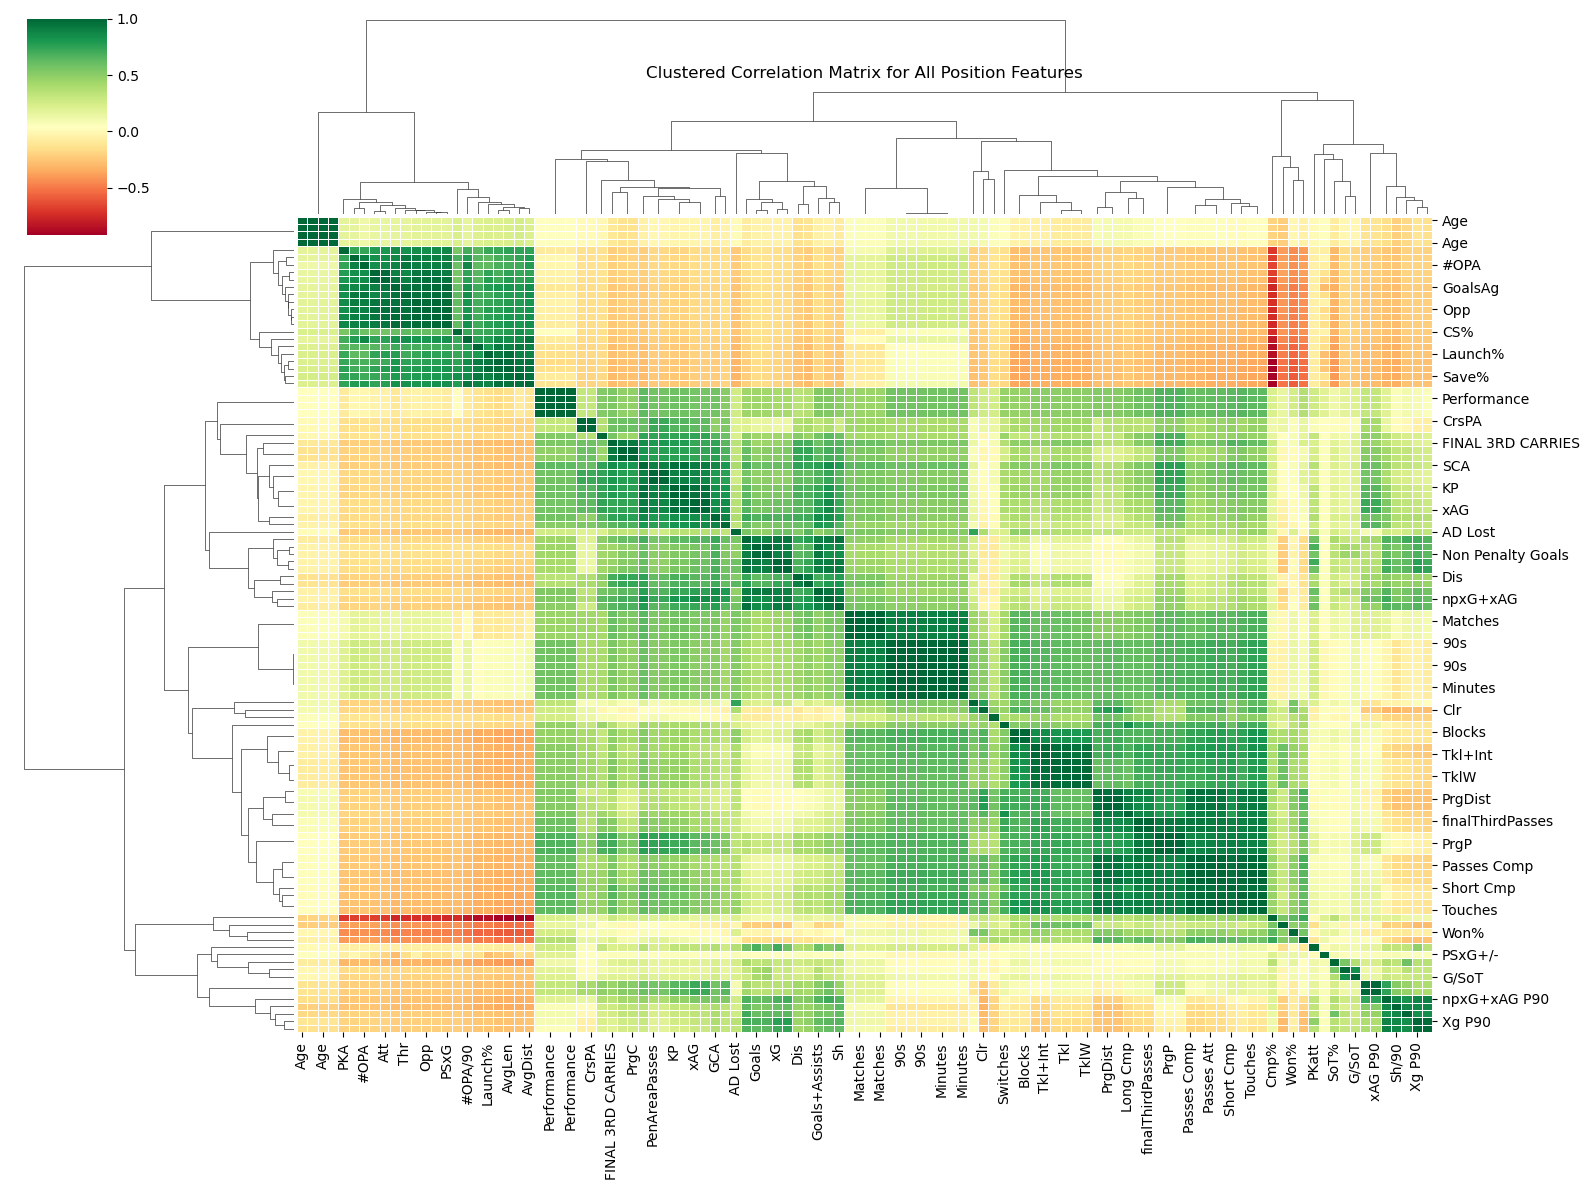

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

features_all_positions = (
    features_goalkeepers + 
    features_defenders + 
    features_midfielders + 
    features_forwards
)

relevant_attributes = [col for col in features_all_positions if col in data.columns]

for col in relevant_attributes:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='coerce')

subset_data = data[relevant_attributes].dropna()

correlation_matrix = subset_data.corr()

plt.figure(figsize=(14, 10))
clustered = sns.clustermap(
    correlation_matrix, 
    cmap='RdYlGn', 
    annot=False, 
    linewidths=.5, 
    figsize=(16, 12),
    method='average'
)
clustered.ax_heatmap.set_title('Clustered Correlation Matrix for All Position Features', pad=100)
plt.show()

## MLR

MLR Model for Goalkeepers:
Mean Squared Error (MSE): 17.17
Root Mean Squared Error (RMSE): 4.14
R² Score: 0.89

Actual vs Predicted Values:
     Actual  Predicted
458    10.0  10.941889
446    15.0  18.068778
448     2.0   3.034477
461     2.0  -6.284057
468     1.5   0.794409


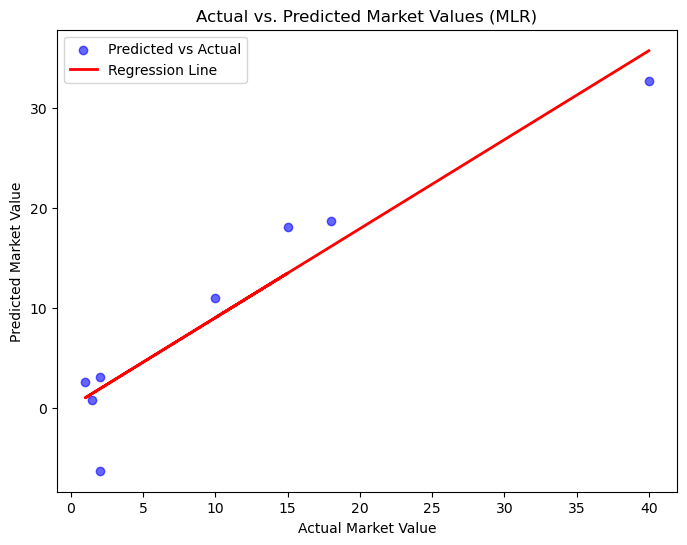

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error


data = pd.read_csv('Book5.csv')
def clean_numeric_columns(df, columns):
    for col in columns:
        df[col] = df[col].replace({',': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

features_goalkeepers = [
    "Saves", "Save%", "SoTA", "CS", "CS%", 
    "PKatt", "PKA", "PSxG", "PSxG/SoT", "PSxG+/-", 
    "Cmp", "Att", "Launch%", "AvgLen", "GKCmp%", 
    "Thr", "Opp", "AvgDist", "#OPA", "#OPA/90",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns_goalkeepers = features_goalkeepers + ['Market Value']

data = clean_numeric_columns(data, all_columns_goalkeepers)
df_goalkeepers = data[data['Pos'] == 'GK'][all_columns_goalkeepers].dropna()

X = df_goalkeepers[features_goalkeepers]
y = df_goalkeepers['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4201)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

y_pred = mlr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MLR Model for Goalkeepers:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (MLR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

MLR Model for Defenders:
Mean Squared Error (MSE): 38.22
Root Mean Squared Error (RMSE): 6.18
R² Score: 0.82

Actual vs Predicted Values:
     Actual  Predicted
68     35.0  21.797394
135     7.0   6.807378
290    13.0   9.967165
54     10.0  16.765221
63     17.0  22.334837


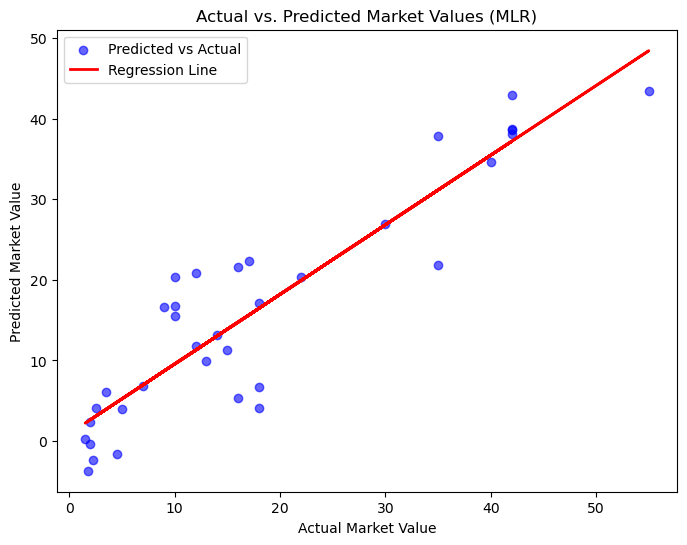

In [120]:
features_defenders = [
    "Tkl", "TklW", "Blocks", "Clr", "Err eading to shots", "GoalsAg",
    "Tkl+Int", "Tkl+Int/90", "Touches", 
    "Passes Comp", "Passes Att", "PrgP", "PrgDist", 
    "AD Won", "AD Lost", "Won%",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns = features_defenders + ['Market Value']
data = clean_numeric_columns(data, all_columns)
df_defenders = data[data['Pos'] == 'DF'][all_columns].dropna()
X = df_defenders[features_defenders]
y = df_defenders['Market Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1805)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

y_pred = mlr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MLR Model for Defenders:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (MLR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

MLR Model for Midfielders:
Mean Squared Error (MSE): 45.74
Root Mean Squared Error (RMSE): 6.76
R² Score: 0.89

Actual vs Predicted Values:
     Actual  Predicted
300     8.0  11.404328
167    85.0  76.515210
229    50.0  43.747460
294    16.0  15.144360
309     2.2   1.995158


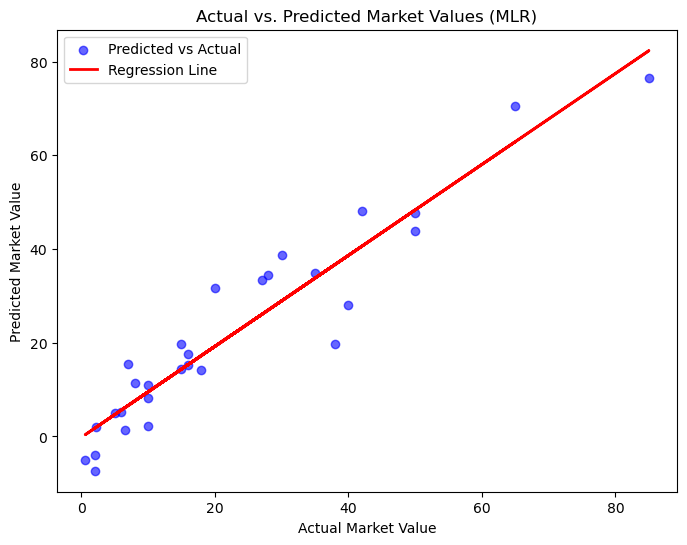

In [121]:
features_midfielders = [
    "Passes Comp", "Passes Comp/90", "Passes Att", "Cmp%", 
    "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA", 
    "Through", "Switches", "Short Cmp", "Med Cmp", "Long Cmp", 
    "PrgC", "PrgP", "PrgDist", "Carries", "FINAL 3RD CARRIES", 
    "Tkl", "TklW", "Tkl+Int", "Blocks", "Touches", "Dis", "Mis", 
    "SCA", "GCA", "xAG", "xAG P90",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns_midfielders = features_midfielders + ['Market Value']

data = clean_numeric_columns(data, all_columns_midfielders)
df_midfielders = data[data['Pos'] == 'MF'][all_columns_midfielders].dropna()

X = df_midfielders[features_midfielders]
y = df_midfielders['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9958)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

y_pred = mlr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MLR Model for Midfielders:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (MLR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

MLR Model for Forwards:
Mean Squared Error (MSE): 111.43
Root Mean Squared Error (RMSE): 10.56
R² Score: 0.83

Actual vs Predicted Values:
     Actual  Predicted
9       1.0 -14.989119
390    24.0  23.249311
208     2.0  10.866210
440    15.0  -1.110749
24      4.0  -3.492050


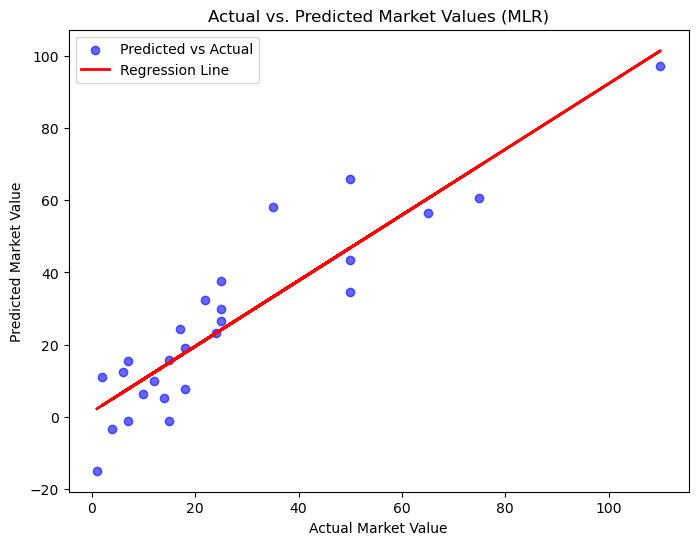

In [122]:
features_forwards = [
    "Goals", "Assists", "Goals+Assists", "Non Penalty Goals", 
    "xG", "npxG", "xAG", "npxG+xAG", 
    "Sh", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", 
    "Xg P90", "xAG P90", "npxG P90", "npxG+xAG P90", 
    "PrgC", "PrgP", "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns_forwards = features_forwards + ['Market Value']

data = clean_numeric_columns(data, all_columns_forwards)
df_forwards = data[data['Pos'] == 'FW'][all_columns_forwards].dropna()

X = df_forwards[features_forwards]
y = df_forwards['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7568)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlr_model = LinearRegression()
mlr_model.fit(X_train_scaled, y_train)

y_pred = mlr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f"MLR Model for Forwards:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (MLR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

## Random Forest Regressor

Random Forest Model for Goalkeepers:
Mean Squared Error (MSE): 7.30
Root Mean Squared Error (RMSE): 2.70
R² Score: 0.92

Actual vs Predicted Values:
     Actual  Predicted
462    28.0    24.2916
465    20.0    19.4936
447     0.4     4.5824
446    15.0    15.3636
457     5.0     9.1720


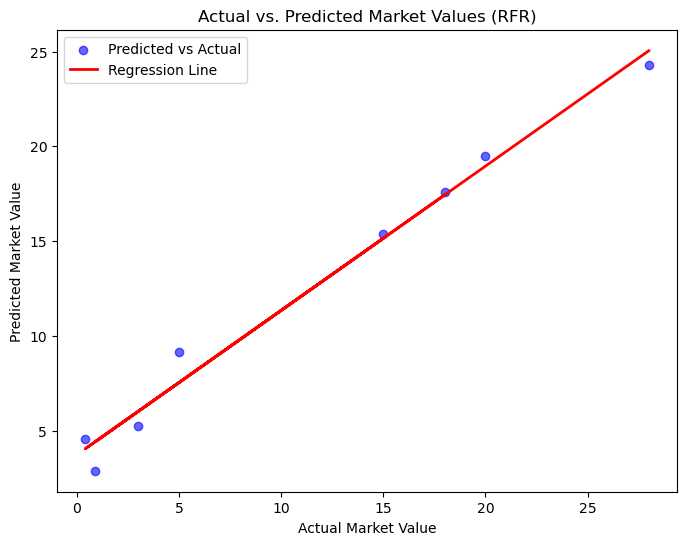

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

data = pd.read_csv('Book5.csv')

def clean_numeric_columns(df, columns):
    for col in columns:
        df[col] = df[col].replace({',': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

features_goalkeepers = [
    "Saves", "Save%", "SoTA", "CS", "CS%", 
    "PKatt", "PKA", "PSxG", "PSxG/SoT", "PSxG+/-", 
    "Cmp", "Att", "Launch%", "AvgLen", "GKCmp%", 
    "Thr", "Opp", "AvgDist", "#OPA", "#OPA/90",
    "Performance", "90s", "Age", "Matches", "Minutes"
]
all_columns = features_goalkeepers + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_goalkeepers = data[data['Pos'] == 'GK'][all_columns].dropna()

X = df_goalkeepers[features_goalkeepers]
y = df_goalkeepers['Market Value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9063
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=250, random_state=9063)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Random Forest Model for Goalkeepers:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (RFR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

Random Forest Model for Defenders:
Mean Squared Error (MSE): 34.26
Root Mean Squared Error (RMSE): 5.85
R² Score: 0.85

Actual vs Predicted Values:
     Actual  Predicted
334     6.0    11.1485
228     4.5     5.3109
296     0.9     3.1052
231    10.0    19.0550
413    13.0    17.3770


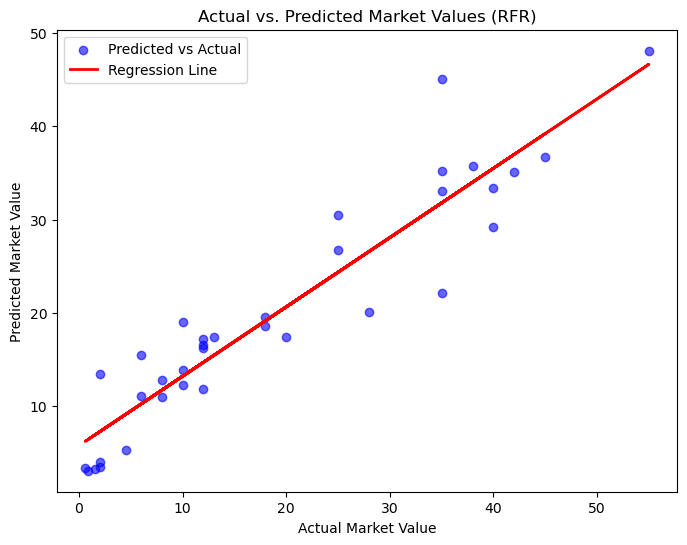

In [124]:
features_defenders = [
    "Tkl", "TklW", "Blocks", "Clr", "Err eading to shots", "GoalsAg",
    "Tkl+Int", "Tkl+Int/90", "Touches", 
    "Passes Comp", "Passes Att", "PrgP", "PrgDist", 
    "AD Won", "AD Lost", "Won%",
    "Performance", "90s", "Age", "Matches", "Minutes"
]
all_columns = features_defenders + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_defenders = data[data['Pos'] == 'DF'][all_columns].dropna()

X = df_defenders[features_defenders]
y = df_defenders['Market Value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=458
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=200, random_state=458)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Random Forest Model for Defenders:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (RFR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

Random Forest Model for Midfielders:
Mean Squared Error (MSE): 49.50
Root Mean Squared Error (RMSE): 7.04
R² Score: 0.84

Actual vs Predicted Values:
     Actual  Predicted
417    38.0    38.9280
60     16.0     8.5036
92     16.0    17.1760
347    15.0    17.9732
38     10.0     9.2156


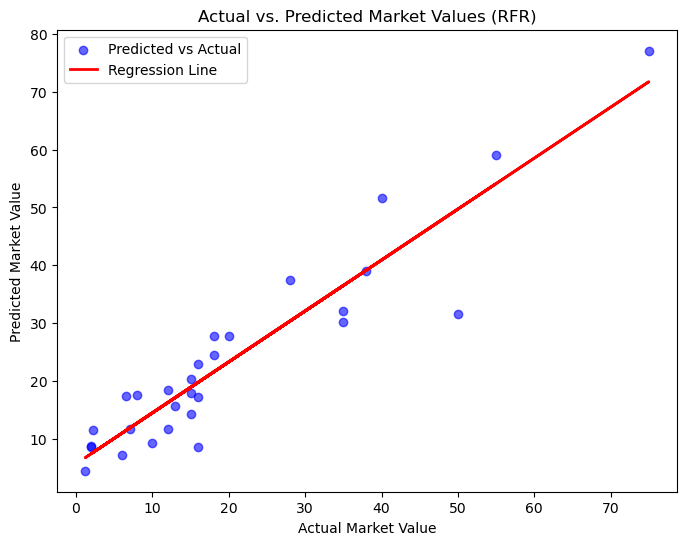

In [125]:
features_midfielders = [
    "Passes Comp", "Passes Comp/90", "Passes Att", "Cmp%", 
    "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA", 
    "Through", "Switches", "Short Cmp", "Med Cmp", "Long Cmp", 
    "PrgC", "PrgP", "PrgDist", "Carries", "FINAL 3RD CARRIES", 
    "Tkl", "TklW", "Tkl+Int", "Blocks", "Touches", "Dis", "Mis", 
    "SCA", "GCA", "xAG", "xAG P90",
    "Performance", "90s", "Age", "Matches", "Minutes"
]
all_columns = features_midfielders + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_midfielders = data[data['Pos'] == 'MF'][all_columns].dropna()

X = df_midfielders[features_midfielders]
y = df_midfielders['Market Value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=5873
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=250, random_state=5873)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Random Forest Model for Midfielders:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (RFR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

Random Forest Model for Forwards:
Mean Squared Error (MSE): 60.68
Root Mean Squared Error (RMSE): 7.79
R² Score: 0.91

Actual vs Predicted Values:


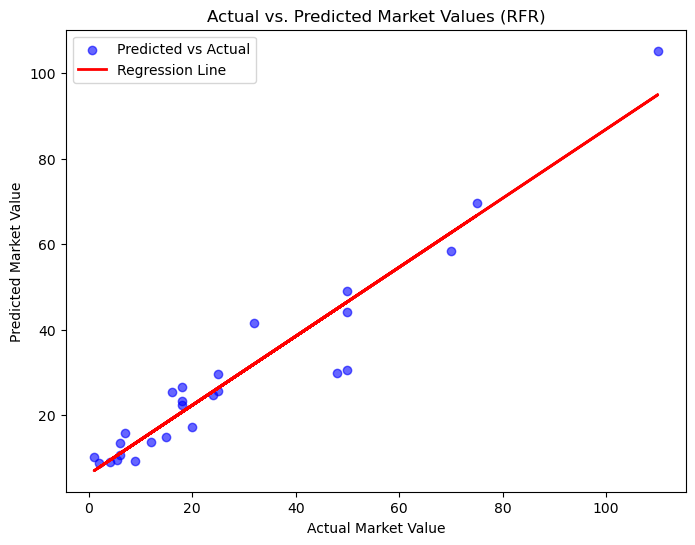

In [126]:
features_forwards = [
    "Goals", "Assists", "Goals+Assists", "Non Penalty Goals", 
    "xG", "npxG", "xAG", "npxG+xAG", 
    "Sh", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", 
    "Xg P90", "xAG P90", "npxG P90", "npxG+xAG P90", 
    "PrgC", "PrgP", "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA",
    "Performance", "90s", "Age", "Matches", "Minutes"
]
all_columns = features_forwards + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_forwards = data[data['Pos'] == 'FW'][all_columns].dropna()

X = df_forwards[features_forwards]
y = df_forwards['Market Value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9472
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=50, random_state=9472)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("Random Forest Model for Forwards:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (RFR)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

## XGB

XGBoost Model for Goalkeepers:
Mean Squared Error (MSE): 3.16
Root Mean Squared Error (RMSE): 1.78
R² Score: 0.96

Actual vs Predicted Values:
     Actual  Predicted
446    15.0  12.259734
462    28.0  25.331602
469     9.0   7.720407
456     0.4   2.003505
466     2.5   4.476483


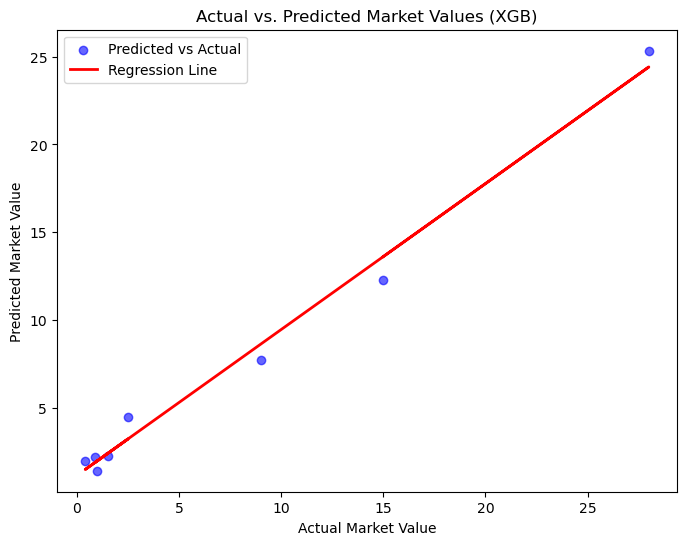

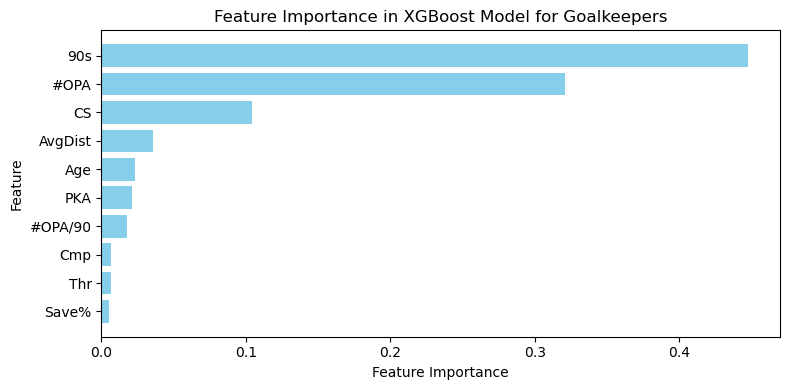

In [127]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from xgboost import XGBRegressor

data = pd.read_csv('Book5.csv')

def clean_numeric_columns(df, columns):
    for col in columns:
        df[col] = df[col].replace({',': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

features_goalkeepers = [
    "Saves", "Save%", "SoTA", "CS", "CS%", 
    "PKatt", "PKA", "PSxG", "PSxG/SoT", "PSxG+/-", 
    "Cmp", "Att", "Launch%", "AvgLen", "GKCmp%", 
    "Thr", "Opp", "AvgDist", "#OPA", "#OPA/90",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns = features_goalkeepers + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_goalkeepers = data[data['Pos'] == 'GK'][all_columns].dropna()

X = df_goalkeepers[features_goalkeepers]
y = df_goalkeepers['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58160)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=58160)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("XGBoost Model for Goalkeepers:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (XGB)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features_goalkeepers,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model for Goalkeepers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [128]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=58160)
xgb_model.fit(X_train_scaled, y_train)
joblib.dump(xgb_model, 'xgb_gk_model.pkl')
joblib.dump(scaler, 'scaler_gk.pkl')

['scaler_gk.pkl']

XGBoost Model for Defenders:
Mean Squared Error (MSE): 27.01
Root Mean Squared Error (RMSE): 5.20
R² Score: 0.88

Actual vs Predicted Values:
     Actual  Predicted
46     45.0  48.499775
78      1.8   4.117706
217    25.0  28.440601
334     6.0  15.486908
64     13.0  10.006974


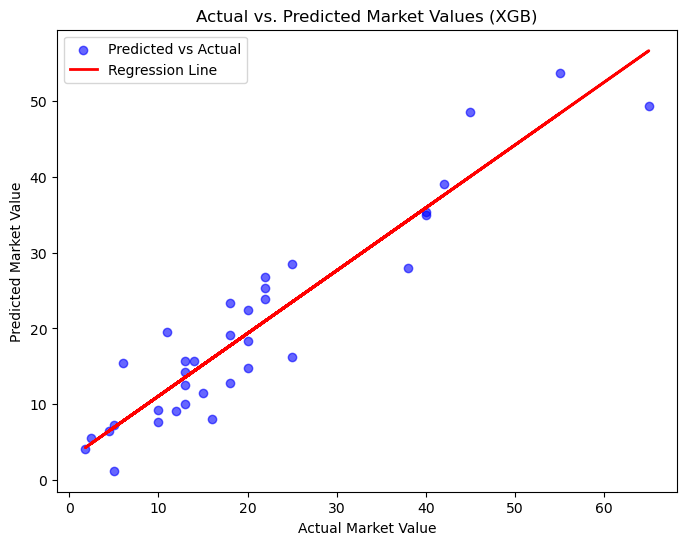

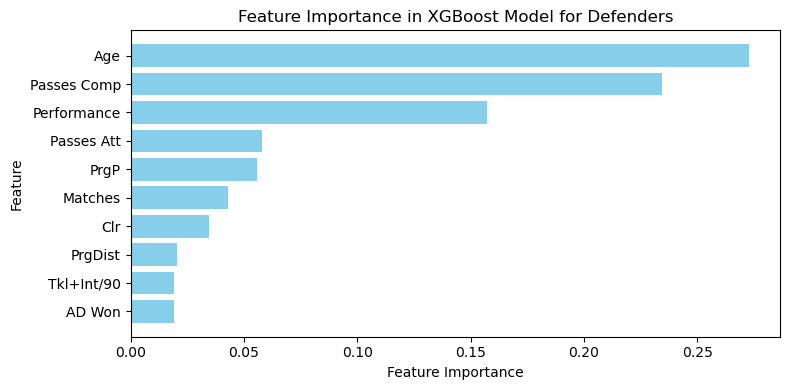

In [129]:
features_defenders = [
    "Tkl", "TklW", "Blocks", "Clr", "Err eading to shots", "GoalsAg",
    "Tkl+Int", "Tkl+Int/90", "Touches", 
    "Passes Comp", "Passes Att", "PrgP", "PrgDist", 
    "AD Won", "AD Lost", "Won%",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns = features_defenders + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_defenders = data[data['Pos'] == 'DF'][all_columns].dropna()

X = df_defenders[features_defenders]
y = df_defenders['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=83599)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=83599)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("XGBoost Model for Defenders:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (XGB)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features_defenders,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model for Defenders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [130]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=83599)
xgb_model.fit(X_train_scaled, y_train)
joblib.dump(xgb_model, 'xgb_df_model.pkl')
joblib.dump(scaler, 'scaler_df.pkl')

['scaler_df.pkl']

XGBoost Model for Midfielders:
Mean Squared Error (MSE): 54.50
Root Mean Squared Error (RMSE): 7.38
R² Score: 0.87

Actual vs Predicted Values:
     Actual  Predicted
367    15.0  15.233547
288    40.0  38.379822
17     13.0  20.296614
110    12.0   9.937397
145    40.0  40.799561


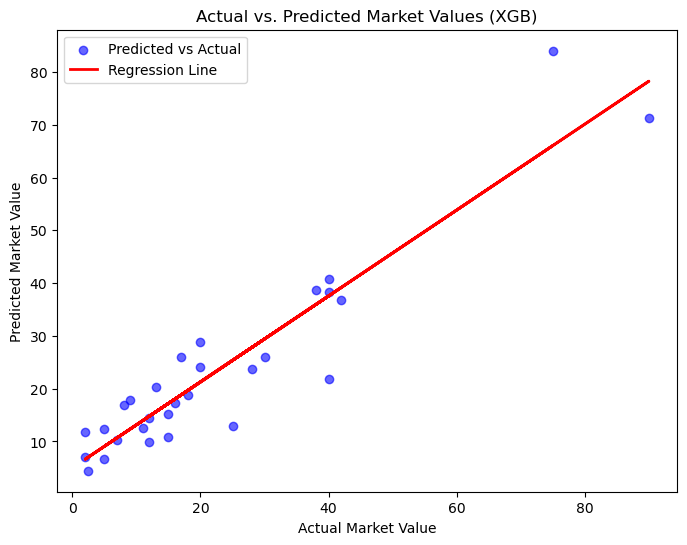

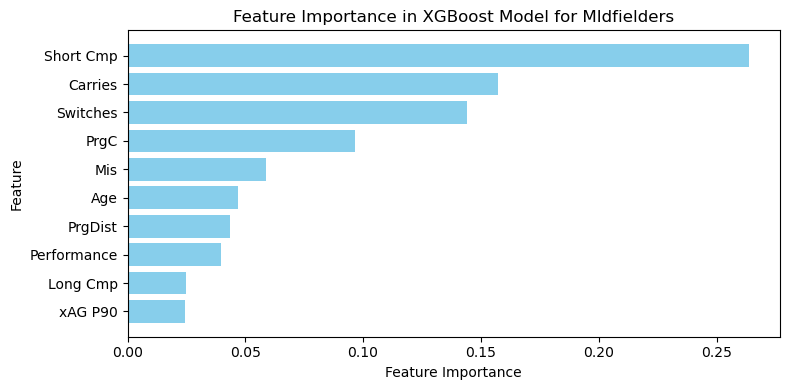

In [131]:
features_midfielders = [
    "Passes Comp", "Passes Comp/90", "Passes Att", "Cmp%", 
    "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA", 
    "Through", "Switches", "Short Cmp", "Med Cmp", "Long Cmp", 
    "PrgC", "PrgP", "PrgDist", "Carries", "FINAL 3RD CARRIES", 
    "Tkl", "TklW", "Tkl+Int", "Blocks", "Touches", "Dis", "Mis", 
    "SCA", "GCA", "xAG", "xAG P90",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns = features_midfielders + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_midfielders = data[data['Pos'] == 'MF'][all_columns].dropna()

X = df_midfielders[features_midfielders]
y = df_midfielders['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=18653)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=18653)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("XGBoost Model for Midfielders:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (XGB)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features_midfielders,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model for MIdfielders')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [132]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=18653)
xgb_model.fit(X_train_scaled, y_train)
joblib.dump(xgb_model, 'xgb_mf_model.pkl')
joblib.dump(scaler, 'scaler_mf.pkl')

['scaler_mf.pkl']

XGBoost Model for Forwards:
Mean Squared Error (MSE): 47.49
Root Mean Squared Error (RMSE): 6.89
R² Score: 0.89

Actual vs Predicted Values:
     Actual  Predicted
403    35.0  27.950251
161    12.0  20.603758
354    25.0  24.127768
134    15.0  29.065136
130    50.0  60.068298


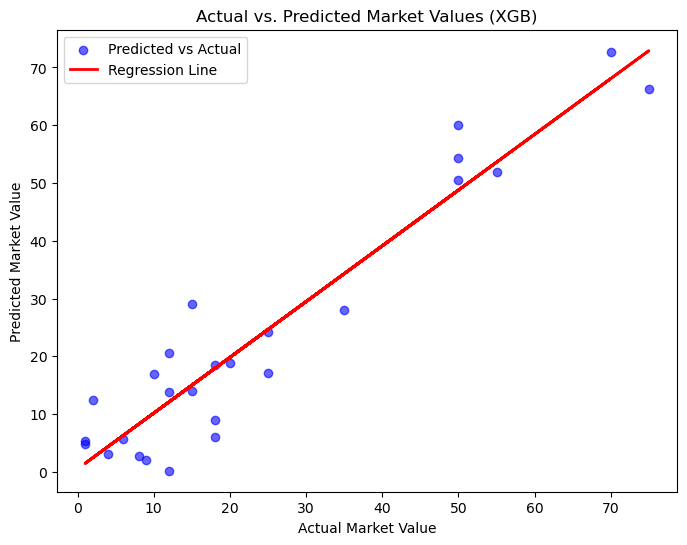

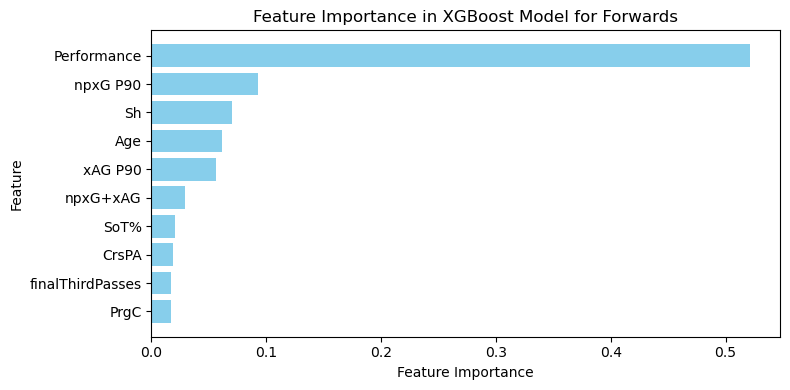

In [133]:
features_forwards = [
    "Goals", "Assists", "Goals+Assists", "Non Penalty Goals", 
    "xG", "npxG", "xAG", "npxG+xAG", 
    "Sh", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", 
    "Xg P90", "xAG P90", "npxG P90", "npxG+xAG P90", 
    "PrgC", "PrgP", "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA",
    "Performance", "90s", "Age", "Matches", "Minutes"
]

all_columns = features_forwards + ['Market Value']

data = clean_numeric_columns(data, all_columns)
df_forwards = data[data['Pos'] == 'FW'][all_columns].dropna()

X = df_forwards[features_forwards]
y = df_forwards['Market Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=86535)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

xgb_model = XGBRegressor(objective='reg:squarederror', random_state=86535)
xgb_model.fit(X_train_scaled, y_train)

y_pred = xgb_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("XGBoost Model for Forwards:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


result_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nActual vs Predicted Values:")
print(result_df.head())

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicted vs Actual')
plt.xlabel('Actual Market Value')
plt.ylabel('Predicted Market Value')
plt.title('Actual vs. Predicted Market Values (XGB)')
regression_line = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, np.polyval(regression_line, y_test), color='red', linewidth=2, label='Regression Line')
plt.legend()
plt.show()

feature_importance = xgb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': features_forwards,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in XGBoost Model for Forwards')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [134]:
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=86535)
xgb_model.fit(X_train_scaled, y_train)
joblib.dump(xgb_model, 'xgb_fw_model.pkl')
joblib.dump(scaler, 'scaler_fw.pkl')

['scaler_fw.pkl']

In [135]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Book5.csv")

for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].str.replace(',', '', regex=True)
        data[col] = pd.to_numeric(data[col], errors='ignore')

features = {
    "GK": [
        "Saves", "Save%", "SoTA", "CS", "CS%", 
        "PKatt", "PKA", "PSxG", "PSxG/SoT", "PSxG+/-", 
        "Cmp", "Att", "Launch%", "AvgLen", "GKCmp%", 
        "Thr", "Opp", "AvgDist", "#OPA", "#OPA/90",
        "Performance", "90s", "Age", "Matches", "Minutes"
    ],
    "DF": [
        "Tkl", "TklW", "Blocks", "Clr", "Err eading to shots", "GoalsAg",
        "Tkl+Int", "Tkl+Int/90", "Touches", 
        "Passes Comp", "Passes Att", "PrgP", "PrgDist", 
        "AD Won", "AD Lost", "Won%",
        "Performance", "90s", "Age", "Matches", "Minutes"
    ],
    "MF": [
        "Passes Comp", "Passes Comp/90", "Passes Att", "Cmp%", 
        "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA", 
        "Through", "Switches", "Short Cmp", "Med Cmp", "Long Cmp", 
        "PrgC", "PrgP", "PrgDist", "Carries", "FINAL 3RD CARRIES", 
        "Tkl", "TklW", "Tkl+Int", "Blocks", "Touches", "Dis", "Mis", 
        "SCA", "GCA", "xAG", "xAG P90",
        "Performance", "90s", "Age", "Matches", "Minutes"
    ],
    "FW": [
        "Goals", "Assists", "Goals+Assists", "Non Penalty Goals", 
        "xG", "npxG", "xAG", "npxG+xAG", 
        "Sh", "SoT", "SoT%", "Sh/90", "SoT/90", "G/Sh", "G/SoT", 
        "Xg P90", "xAG P90", "npxG P90", "npxG+xAG P90", 
        "PrgC", "PrgP", "KP", "finalThirdPasses", "PenAreaPasses", "CrsPA",
        "Performance", "90s", "Age", "Matches", "Minutes"
    ]
}

player_number = int(input("Enter the Player Number: "))

if player_number not in data['No.'].values:
    print("Player number not found in the dataset.")
else:
    player_data = data[data['No.'] == player_number].iloc[0]
    position = player_data['Pos']

    if position not in features:
        print("Position not recognized or model not trained for this position.")
    else:
        model = joblib.load(f"xgb_{position.lower()}_model.pkl")
        scaler = joblib.load(f"scaler_{position.lower()}.pkl")
        
        position_features = features[position]
        player_features = player_data[position_features].values.reshape(1, -1)
        
        if player_features.shape[1] != len(position_features):
            print("Incomplete data for player. Cannot predict.")
        else:
            player_features_df = pd.DataFrame(player_features, columns=position_features)
            player_features_scaled = scaler.transform(player_features_df)
            
            predicted_value = model.predict(player_features_scaled)[0]
            player_name = player_data['Player'] if 'Market Value' in player_data else "Unknown"
            actual_value = player_data['Market Value'] if 'Market Value' in player_data else "Unknown"
            
            print(f"Player {player_name}, No.{player_number} - Position: {position}")
            print(f"Actual Market Value: {actual_value}")
            print(f"Predicted Market Value: {predicted_value:.2f}")

Enter the Player Number: 298
Player Pedro Neto, No.298 - Position: FW
Actual Market Value: 32.0
Predicted Market Value: 32.00
